# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.width', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Ingest Data  

In [2]:
mil = pd.read_excel('World military power.xlsx', header=[0,1])
mil

2020 ranking                               Airforce Strength                          \
    Military Strength Military Strength Power Index Aircraft Strength Aircraft Strength value   
0         Afghanistan                         1.344       Afghanistan                 260.000   
1             Albania                         2.314           Albania                  19.000   
2             Algeria                         0.466           Algeria                 551.000   
3              Angola                         0.838            Angola                 295.000   
4           Argentina                         0.652         Argentina                 227.000   
..                ...                           ...               ...                     ...   
133         Venezuela                         0.645         Venezuela                 260.000   
134           Vietnam                         0.356           Vietnam                 293.000   
135             Yemen                         1.241             Yemen                 169.000   
136            Zambia                         1.646            Zambia                 108.000   
137          Zimbabwe                         1.758          Zimbabwe                  90.000   

                                                                                              \
    Fighter/Interceptor Strength Fighter/Interceptor Strength value Attack Aircraft Strength   
0                    Afghanistan                              0.000              Afghanistan   
1                        Albania                              0.000                  Albania   
2                        Algeria                            103.000                  Algeria   
3                         Angola                             72.000                   Angola   
4                      Argentina                             24.000                Argentina   
..                           ...                                ...                      ...   
133                    Venezuela                             38.000                Venezuela   
134                      Vietnam                             77.000                  Vietnam   
135                        Yemen                             77.000                    Yemen   
136                       Zambia                             18.000                   Zambia   
137                     Zimbabwe                             10.000                 Zimbabwe   

                                                                      \
    Attack Aircraft Strength value Transport Aircraft Fleet Strength   
0                           25.000                       Afghanistan   
1                            0.000                           Albania   
2                           22.000                           Algeria   
3                           18.000                            Angola   
4                            7.000                         Argentina   
..                             ...                               ...   
133                          0.000                         Venezuela   
134                          0.000                           Vietnam   
135                          0.000                             Yemen   
136                          0.000                            Zambia   
137                          0.000                          Zimbabwe   

                                             ...         Manpower                         \
    Transport Aircraft Fleet Strength value  ... Total Population Total Population value   
0                                    30.000  ...      Afghanistan            3,49,40,837   
1                                     0.000  ...          Albania              30,57,220   
2                                    59.000  ...          Algeria            4,16,57,488   
3                                    30.000  ...           Angola            3,03,55,880   
4        

# EDA

## Implement basic steps to see how is your data looks like

In [3]:
mil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   (2020 ranking, Military Strength)                             138 non-null    object 
 1   (2020 ranking, Military Strength Power Index)                 138 non-null    float64
 2   (Airforce Strength, Aircraft Strength)                        138 non-null    object 
 3   (Airforce Strength, Aircraft Strength value)                  138 non-null    float64
 4   (Airforce Strength, Fighter/Interceptor Strength)             138 non-null    object 
 5   (Airforce Strength, Fighter/Interceptor Strength value)       138 non-null    float64
 6   (Airforce Strength, Attack Aircraft Strength)                 138 non-null    object 
 7   (Airforce Strength, Attack Aircraft Strength value)           138 non-n

In [4]:
mil.shape, mil.size

((138, 60), 8280)

In [5]:
mil.dtypes.value_counts()

object     40
float64    20
dtype: int64

In [6]:
mil.isnull().sum().sum()

288

In [7]:
mil.duplicated().sum()

0

## Convert multi index columns to one level

In [8]:
mil.columns

MultiIndex([(     '2020 ranking',                       'Military Strength'),
            (     '2020 ranking',           'Military Strength Power Index'),
            ('Airforce Strength',                       'Aircraft Strength'),
            ('Airforce Strength',                 'Aircraft Strength value'),
            ('Airforce Strength',            'Fighter/Interceptor Strength'),
            ('Airforce Strength',      'Fighter/Interceptor Strength value'),
            ('Airforce Strength',                'Attack Aircraft Strength'),
            ('Airforce Strength',          'Attack Aircraft Strength value'),
            ('Airforce Strength',       'Transport Aircraft Fleet Strength'),
            ('Airforce Strength', 'Transport Aircraft Fleet Strength value'),
            ('Airforce Strength',                  'Trainer Aircraft Fleet'),
            ('Airforce Strength',            'Trainer Aircraft Fleet value'),
            ('Airforce Strength',               'Helicopter Flee

In [9]:
mil.columns = [' & '.join(col) for col in mil.columns.values]
mil.columns = mil.columns.str.strip()
mil.columns
# mil.columns = mil.columns.get_level_values(0) + '_' + mil.columns.get_level_values(1)

Index(['2020 ranking & Military Strength', '2020 ranking & Military Strength Power Index',
       'Airforce Strength & Aircraft Strength', 'Airforce Strength & Aircraft Strength value',
       'Airforce Strength & Fighter/Interceptor Strength',
       'Airforce Strength & Fighter/Interceptor Strength value',
       'Airforce Strength & Attack Aircraft Strength',
       'Airforce Strength & Attack Aircraft Strength value',
       'Airforce Strength & Transport Aircraft Fleet Strength',
       'Airforce Strength & Transport Aircraft Fleet Strength value',
       'Airforce Strength & Trainer Aircraft Fleet',
       'Airforce Strength & Trainer Aircraft Fleet value',
       'Airforce Strength & Helicopter Fleet Strength',
       'Airforce Strength & Helicopter Fleet Strength value',
       'Airforce Strength & Attack Helicopter Fleet Strength',
       'Airforce Strength & Attack Helicopter Fleet Strength value',
       'Land Strength & Tank Strength', 'Land Strength & Tank Strength value',

In [10]:
mil.head()

,2020 ranking & Military Strength,2020 ranking & Military Strength Power Index,Airforce Strength & Aircraft Strength,Airforce Strength & Aircraft Strength value,Airforce Strength & Fighter/Interceptor Strength,Airforce Strength & Fighter/Interceptor Strength value,Airforce Strength & Attack Aircraft Strength,Airforce Strength & Attack Aircraft Strength value,Airforce Strength & Transport Aircraft Fleet Strength,Airforce Strength & Transport Aircraft Fleet Strength value,...,Manpower & Total Population,Manpower & Total Population value,Geography & Total Square Land Area,Geography & Total Square Land Area value,Geography & Total Coastline Coverage,Geography & Total Coastline Coverage value,Geography & Total Waterway Coverage,Geography & Total Waterway Coverage value,Geography & Total Border Coverage,Geography & Total Border Coverage value
0,Afghanistan,1.344,Afghanistan,260.000,Afghanistan,0.000,Afghanistan,25.000,Afghanistan,30.000,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.000,Afghanistan,1200.000,Afghanistan,5987.000
1,Albania,2.314,Albania,19.000,Albania,0.000,Albania,0.000,Albania,0.000,...,Albania,"30,57,220",Albania,28748.000,Albania,362.000,Albania,41.000,Albania,691.000
2,Algeria,0.466,Algeria,551.000,Algeria,103.000,Algeria,22.000,Algeria,59.000,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.000,Algeria,0.000,Algeria,6734.000
3,Angola,0.838,Angola,295.000,Angola,72.000,Angola,18.000,Angola,30.000,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600.000,Angola,1300.000,Angola,5369.000
4,Argentina,0.652,Argentina,227.000,Argentina,24.000,Argentina,7.000,Argentina,9.000,...,Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989.000,Argentina,11000.000,Argentina,11968.000


## Detect and drop duplicated columns

In [11]:
col_list = ['2020 ranking & Military Strength']

for col in mil.columns.drop('2020 ranking & Military Strength'):
    if mil['2020 ranking & Military Strength'].equals(mil[col]) == False:
        col_list.append(col)
        
print(len(col_list), '\n', col_list)

38 
 ['2020 ranking & Military Strength', '2020 ranking & Military Strength Power Index', 'Airforce Strength & Aircraft Strength value', 'Airforce Strength & Fighter/Interceptor Strength value', 'Airforce Strength & Attack Aircraft Strength value', 'Airforce Strength & Transport Aircraft Fleet Strength value', 'Airforce Strength & Trainer Aircraft Fleet value', 'Airforce Strength & Helicopter Fleet Strength value', 'Airforce Strength & Attack Helicopter Fleet Strength value', 'Land Strength & Tank Strength value', 'Land Strength & AFV/APC Strength value', 'Land Strength & Self-Propelled Artillery Strength value', 'Land Strength & Towed Artillery Strength value', 'Land Strength & Rocket Projector Strength value', 'Navy Strength & Navy Fleet Strengths', 'Navy Strength & Navy Fleet Strengths value', 'Navy Strength & Aircraft Carrier Fleet Strength', 'Navy Strength & Aircraft Carrier Fleet Strength value', 'Navy Strength & Submarine Fleet Strength', 'Navy Strength & Submarine Fleet Strengt

In [12]:
df = mil[col_list]
df

,2020 ranking & Military Strength,2020 ranking & Military Strength Power Index,Airforce Strength & Aircraft Strength value,Airforce Strength & Fighter/Interceptor Strength value,Airforce Strength & Attack Aircraft Strength value,Airforce Strength & Transport Aircraft Fleet Strength value,Airforce Strength & Trainer Aircraft Fleet value,Airforce Strength & Helicopter Fleet Strength value,Airforce Strength & Attack Helicopter Fleet Strength value,Land Strength & Tank Strength value,...,Natural resources & Oil Consumption value,Natural resources & Proven Oil Reserves value,Manpower & Available Manpower value,Manpower & Total Population value,Geography & Total Square Land Area value,Geography & Total Coastline Coverage,Geography & Total Coastline Coverage value,Geography & Total Waterway Coverage value,Geography & Total Border Coverage,Geography & Total Border Coverage value
0,Afghanistan,1.344,260.000,0.000,25.000,30.000,0.000,187.000,0.000,0.000,...,5500.000,0.000,"1,43,25,743","3,49,40,837","6,52,230",Afghanistan,0.000,1200.000,Afghanistan,5987.000
1,Albania,2.314,19.000,0.000,0.000,0.000,0.000,19.000,0.000,0.000,...,42500.000,"16,83,00,000","15,19,438","30,57,220",28748.000,Albania,362.000,41.000,Albania,691.000
2,Algeria,0.466,551.000,103.000,22.000,59.000,87.000,257.000,45.000,880.000,...,"3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",Algeria,998.000,0.000,Algeria,6734.000
3,Angola,0.838,295.000,72.000,18.000,30.000,47.000,126.000,15.000,379.000,...,82300.000,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",Angola,1600.000,1300.000,Angola,5369.000
4,Argentina,0.652,227.000,24.000,7.000,9.000,64.000,100.000,0.000,370.000,...,"6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",Argentina,4989.000,11000.000,Argentina,11968.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Venezuela,0.645,260.000,38.000,0.000,52.000,82.000,86.000,10.000,390.000,...,"5,75,000","3,00,90,00,00,000","1,42,60,129","3,16,89,176","9,12,050",Venezuela,2800.000,7100.000,Venezuela,5267.000
134,Vietnam,0.356,293.000,77.000,0.000,38.000,36.000,138.000,25.000,2615.000,...,"5,25,000","4,40,00,00,000","5,10,43,216","9,70,40,334","3,31,210",Vietnam,3444.000,17702.000,Vietnam,4616.000
135,Yemen,1.241,169.000,77.000,0.000,8.000,21.000,61.000,14.000,620.000,...,"1,45,000","3,00,00,00,000","1,12,66,221","2,86,67,230","5,27,968",Yemen,1906.000,0.000,Yemen,1601.000
136,Zambia,1.646,108.000,18.000,0.000,11.000,52.000,27.000,0.000,75.000,...,21000.000,0.000,"61,66,905","1,64,45,079","7,52,618",NaN,NaN,2250.000,Zambia,6043.000


In [13]:
df.select_dtypes('object')

,2020 ranking & Military Strength,Navy Strength & Navy Fleet Strengths,Navy Strength & Aircraft Carrier Fleet Strength,Navy Strength & Submarine Fleet Strength,Navy Strength & Destroyer Fleet Strength,Navy Strength & Frigate Fleet Strength,Finances & defense spending budget value,Finances & External Debt value,Natural resources & Oil Production value,Natural resources & Oil Consumption value,Natural resources & Proven Oil Reserves value,Manpower & Available Manpower value,Manpower & Total Population value,Geography & Total Square Land Area value,Geography & Total Coastline Coverage,Geography & Total Coastline Coverage value,Geography & Total Waterway Coverage value,Geography & Total Border Coverage
0,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,"12,00,00,00,000","2,84,00,00,000",0.000,5500.000,0.000,"1,43,25,743","3,49,40,837","6,52,230",Afghanistan,0.000,1200.000,Afghanistan
1,Albania,Albania,Albania,Albania,Albania,Albania,"25,00,00,000","9,50,50,00,000",16000.000,42500.000,"16,83,00,000","15,19,438","30,57,220",28748.000,Albania,362.000,41.000,Albania
2,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,"13,00,00,00,000","6,26,00,00,000","13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",Algeria,998.000,0.000,Algeria
3,Angola,Angola,Angola,Angola,Angola,Angola,"7,00,00,00,000","42,08,00,00,000","16,66,000",82300.000,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",Angola,1600.000,1300.000,Angola
4,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,"4,20,00,00,000","2,14,90,00,00,000","4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",Argentina,4989.000,11000.000,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Venezuela,Venezuela,Venezuela,Venezuela,Venezuela,Venezuela,"74,50,00,000","1,00,30,00,00,000","20,07,000","5,75,000","3,00,90,00,00,000","1,42,60,129","3,16,89,176","9,12,050",Venezuela,2800.000,7100.000,Venezuela
134,Vietnam,Vietnam,Vietnam,Vietnam,Vietnam,Vietnam,"5,50,00,00,000","96,58,00,00,000","2,71,400","5,25,000","4,40,00,00,000","5,10,43,216","9,70,40,334","3,31,210",Vietnam,3444.000,17702.000,Vietnam
135,Yemen,Yemen,Yemen,Yemen,Yemen,Yemen,"1,40,00,00,000","7,06,80,00,000",12260.000,"1,45,000","3,00,00,00,000","1,12,66,221","2,86,67,230","5,27,968",Yemen,1906.000,0.000,Yemen
136,Zambia,Zambia,Zambia,Zambia,Zambia,Zambia,"4,00,00,000","11,66,00,00,000",0.000,21000.000,0.000,"61,66,905","1,64,45,079","7,52,618",NaN,NaN,2250.000,Zambia


In [14]:
df.drop(df.select_dtypes('object').iloc[:, [1,2,3,4,5,14,17]].columns, axis=1, inplace=True)
df

,2020 ranking & Military Strength,2020 ranking & Military Strength Power Index,Airforce Strength & Aircraft Strength value,Airforce Strength & Fighter/Interceptor Strength value,Airforce Strength & Attack Aircraft Strength value,Airforce Strength & Transport Aircraft Fleet Strength value,Airforce Strength & Trainer Aircraft Fleet value,Airforce Strength & Helicopter Fleet Strength value,Airforce Strength & Attack Helicopter Fleet Strength value,Land Strength & Tank Strength value,...,Logistics & Airport Totals value,Natural resources & Oil Production value,Natural resources & Oil Consumption value,Natural resources & Proven Oil Reserves value,Manpower & Available Manpower value,Manpower & Total Population value,Geography & Total Square Land Area value,Geography & Total Coastline Coverage value,Geography & Total Waterway Coverage value,Geography & Total Border Coverage value
0,Afghanistan,1.344,260.000,0.000,25.000,30.000,0.000,187.000,0.000,0.000,...,43.000,0.000,5500.000,0.000,"1,43,25,743","3,49,40,837","6,52,230",0.000,1200.000,5987.000
1,Albania,2.314,19.000,0.000,0.000,0.000,0.000,19.000,0.000,0.000,...,4.000,16000.000,42500.000,"16,83,00,000","15,19,438","30,57,220",28748.000,362.000,41.000,691.000
2,Algeria,0.466,551.000,103.000,22.000,59.000,87.000,257.000,45.000,880.000,...,157.000,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.000,0.000,6734.000
3,Angola,0.838,295.000,72.000,18.000,30.000,47.000,126.000,15.000,379.000,...,176.000,"16,66,000",82300.000,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.000,1300.000,5369.000
4,Argentina,0.652,227.000,24.000,7.000,9.000,64.000,100.000,0.000,370.000,...,1138.000,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989.000,11000.000,11968.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Venezuela,0.645,260.000,38.000,0.000,52.000,82.000,86.000,10.000,390.000,...,444.000,"20,07,000","5,75,000","3,00,90,00,00,000","1,42,60,129","3,16,89,176","9,12,050",2800.000,7100.000,5267.000
134,Vietnam,0.356,293.000,77.000,0.000,38.000,36.000,138.000,25.000,2615.000,...,45.000,"2,71,400","5,25,000","4,40,00,00,000","5,10,43,216","9,70,40,334","3,31,210",3444.000,17702.000,4616.000
135,Yemen,1.241,169.000,77.000,0.000,8.000,21.000,61.000,14.000,620.000,...,57.000,12260.000,"1,45,000","3,00,00,00,000","1,12,66,221","2,86,67,230","5,27,968",1906.000,0.000,1601.000
136,Zambia,1.646,108.000,18.000,0.000,11.000,52.000,27.000,0.000,75.000,...,88.000,0.000,21000.000,0.000,"61,66,905","1,64,45,079","7,52,618",NaN,2250.000,6043.000


In [15]:
col_list1, col_list2 = [], []

for col1 in df.columns:
    for col2 in df.columns.drop(col1):
        if df[col1].equals(df[col2]) == True:
            col_list1.append(col1)
            col_list2.append(col2)
            
print(col_list1, col_list2)

[] []


In [16]:
df.shape

(138, 31)

In [17]:
df.rename({'2020 ranking & Military Strength': 'Country', 
           '2020 ranking & Military Strength Power Index': 'Military Strength Power Index'}, axis='columns', inplace=True)

In [18]:
df

,Country,Military Strength Power Index,Airforce Strength & Aircraft Strength value,Airforce Strength & Fighter/Interceptor Strength value,Airforce Strength & Attack Aircraft Strength value,Airforce Strength & Transport Aircraft Fleet Strength value,Airforce Strength & Trainer Aircraft Fleet value,Airforce Strength & Helicopter Fleet Strength value,Airforce Strength & Attack Helicopter Fleet Strength value,Land Strength & Tank Strength value,...,Logistics & Airport Totals value,Natural resources & Oil Production value,Natural resources & Oil Consumption value,Natural resources & Proven Oil Reserves value,Manpower & Available Manpower value,Manpower & Total Population value,Geography & Total Square Land Area value,Geography & Total Coastline Coverage value,Geography & Total Waterway Coverage value,Geography & Total Border Coverage value
0,Afghanistan,1.344,260.000,0.000,25.000,30.000,0.000,187.000,0.000,0.000,...,43.000,0.000,5500.000,0.000,"1,43,25,743","3,49,40,837","6,52,230",0.000,1200.000,5987.000
1,Albania,2.314,19.000,0.000,0.000,0.000,0.000,19.000,0.000,0.000,...,4.000,16000.000,42500.000,"16,83,00,000","15,19,438","30,57,220",28748.000,362.000,41.000,691.000
2,Algeria,0.466,551.000,103.000,22.000,59.000,87.000,257.000,45.000,880.000,...,157.000,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.000,0.000,6734.000
3,Angola,0.838,295.000,72.000,18.000,30.000,47.000,126.000,15.000,379.000,...,176.000,"16,66,000",82300.000,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.000,1300.000,5369.000
4,Argentina,0.652,227.000,24.000,7.000,9.000,64.000,100.000,0.000,370.000,...,1138.000,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989.000,11000.000,11968.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Venezuela,0.645,260.000,38.000,0.000,52.000,82.000,86.000,10.000,390.000,...,444.000,"20,07,000","5,75,000","3,00,90,00,00,000","1,42,60,129","3,16,89,176","9,12,050",2800.000,7100.000,5267.000
134,Vietnam,0.356,293.000,77.000,0.000,38.000,36.000,138.000,25.000,2615.000,...,45.000,"2,71,400","5,25,000","4,40,00,00,000","5,10,43,216","9,70,40,334","3,31,210",3444.000,17702.000,4616.000
135,Yemen,1.241,169.000,77.000,0.000,8.000,21.000,61.000,14.000,620.000,...,57.000,12260.000,"1,45,000","3,00,00,00,000","1,12,66,221","2,86,67,230","5,27,968",1906.000,0.000,1601.000
136,Zambia,1.646,108.000,18.000,0.000,11.000,52.000,27.000,0.000,75.000,...,88.000,0.000,21000.000,0.000,"61,66,905","1,64,45,079","7,52,618",NaN,2250.000,6043.000


## Check for missing values 

In [19]:
df.isnull().sum().sum()

144

In [20]:
df.columns[df.isnull().any() == True]

Index(['Navy Strength & Navy Fleet Strengths value',
       'Navy Strength & Aircraft Carrier Fleet Strength value',
       'Navy Strength & Submarine Fleet Strength value',
       'Navy Strength & Destroyer Fleet Strength value',
       'Navy Strength & Frigate Fleet Strength value',
       'Geography & Total Coastline Coverage value', 'Geography & Total Border Coverage value'],
      dtype='object')

In [21]:
df_temp = df[df.isna().any(axis=1)][['Country', 'Navy Strength & Navy Fleet Strengths value',
       'Navy Strength & Aircraft Carrier Fleet Strength value',
       'Navy Strength & Submarine Fleet Strength value',
       'Navy Strength & Destroyer Fleet Strength value',
       'Navy Strength & Frigate Fleet Strength value',
       'Geography & Total Coastline Coverage value',
       'Geography & Total Border Coverage value']]
df_temp

,Country,Navy Strength & Navy Fleet Strengths value,Navy Strength & Aircraft Carrier Fleet Strength value,Navy Strength & Submarine Fleet Strength value,Navy Strength & Destroyer Fleet Strength value,Navy Strength & Frigate Fleet Strength value,Geography & Total Coastline Coverage value,Geography & Total Border Coverage value
5,Armenia,0.000,NaN,NaN,NaN,NaN,NaN,1570.000
6,Australia,48.000,2.000,6.000,2.000,8.000,25760.000,NaN
7,Austria,0.000,NaN,NaN,NaN,NaN,NaN,2524.000
9,Bahrain,39.000,0.000,0.000,0.000,1.000,161.000,NaN
11,Belarus,0.000,NaN,NaN,NaN,NaN,NaN,3599.000
13,Bhutan,0.000,NaN,NaN,NaN,NaN,NaN,1136.000
14,Bolivia,173.000,0.000,0.000,0.000,0.000,NaN,7252.000
16,Botswana,NaN,NaN,NaN,NaN,NaN,NaN,4347.000
19,Burkina Faso,NaN,NaN,NaN,NaN,NaN,NaN,3611.000
23,Central African Republic,NaN,NaN,NaN,NaN,NaN,NaN,5920.000


In [22]:
df_temp.shape

(40, 8)

## Deal with missing values 
* Hint-1, use wikipedia to fill in missing values ​​comparing with similar countries
* Hint-2, Georeferences of countries can help you

In [23]:
df_temp.iloc[:, [0,6,7]]

,Country,Geography & Total Coastline Coverage value,Geography & Total Border Coverage value
5,Armenia,NaN,1570.000
6,Australia,25760.000,NaN
7,Austria,NaN,2524.000
9,Bahrain,161.000,NaN
11,Belarus,NaN,3599.000
13,Bhutan,NaN,1136.000
14,Bolivia,NaN,7252.000
16,Botswana,NaN,4347.000
19,Burkina Faso,NaN,3611.000
23,Central African Republic,NaN,5920.000


In [24]:
# Since some of these countries are landlocked and some are islands, I will replace the NaN values with '0'
df[['Geography & Total Coastline Coverage value', 'Geography & Total Border Coverage value']].fillna(0, inplace=True)

In [25]:
df_temp.iloc[:, 0:6]

,Country,Navy Strength & Navy Fleet Strengths value,Navy Strength & Aircraft Carrier Fleet Strength value,Navy Strength & Submarine Fleet Strength value,Navy Strength & Destroyer Fleet Strength value,Navy Strength & Frigate Fleet Strength value
5,Armenia,0.000,NaN,NaN,NaN,NaN
6,Australia,48.000,2.000,6.000,2.000,8.000
7,Austria,0.000,NaN,NaN,NaN,NaN
9,Bahrain,39.000,0.000,0.000,0.000,1.000
11,Belarus,0.000,NaN,NaN,NaN,NaN
13,Bhutan,0.000,NaN,NaN,NaN,NaN
14,Bolivia,173.000,0.000,0.000,0.000,0.000
16,Botswana,NaN,NaN,NaN,NaN,NaN
19,Burkina Faso,NaN,NaN,NaN,NaN,NaN
23,Central African Republic,NaN,NaN,NaN,NaN,NaN


www.globalfirepower.com 

In [26]:
# South Korea (values are taken from the www.globalfirepower.com website)
df.loc[110, 'Navy Strength & Aircraft Carrier Fleet Strength value':\
       'Navy Strength & Frigate Fleet Strength value'] = [0, 22, 12, 18]

In [27]:
# Other NaN values
df.fillna(0, inplace=True)

In [28]:
# there is some incorrect data about South Sudan in the columns related to Navy Strength.
# (verified in domain search)
# we know that South Sudan is a landlocked country

df.loc[111, 'Navy Strength & Aircraft Carrier Fleet Strength value':\
       'Navy Strength & Frigate Fleet Strength value'] = 0

In [29]:
df.loc[111, 'Navy Strength & Aircraft Carrier Fleet Strength value':\
       'Navy Strength & Frigate Fleet Strength value']

Navy Strength & Aircraft Carrier Fleet Strength value   0.000
Navy Strength & Submarine Fleet Strength value          0.000
Navy Strength & Destroyer Fleet Strength value          0.000
Navy Strength & Frigate Fleet Strength value            0.000
Name: 111, dtype: object

In [30]:
df.isnull().sum().sum()

0

## Fix the dtypes

In [31]:
df.dtypes.value_counts()

float64    20
object     11
dtype: int64

In [32]:
df.select_dtypes('float64')

,Military Strength Power Index,Airforce Strength & Aircraft Strength value,Airforce Strength & Fighter/Interceptor Strength value,Airforce Strength & Attack Aircraft Strength value,Airforce Strength & Transport Aircraft Fleet Strength value,Airforce Strength & Trainer Aircraft Fleet value,Airforce Strength & Helicopter Fleet Strength value,Airforce Strength & Attack Helicopter Fleet Strength value,Land Strength & Tank Strength value,Land Strength & AFV/APC Strength value,Land Strength & Self-Propelled Artillery Strength value,Land Strength & Towed Artillery Strength value,Land Strength & Rocket Projector Strength value,Navy Strength & Navy Fleet Strengths value,Navy Strength & Aircraft Carrier Fleet Strength value,Navy Strength & Submarine Fleet Strength value,Navy Strength & Destroyer Fleet Strength value,Navy Strength & Frigate Fleet Strength value,Logistics & Airport Totals value,Geography & Total Border Coverage value
0,1.344,260.000,0.000,25.000,30.000,0.000,187.000,0.000,0.000,1062.000,0.000,176.000,50.000,0.000,0.000,0.000,0.000,0.000,43.000,5987.000
1,2.314,19.000,0.000,0.000,0.000,0.000,19.000,0.000,0.000,467.000,0.000,0.000,0.000,38.000,0.000,0.000,0.000,0.000,4.000,691.000
2,0.466,551.000,103.000,22.000,59.000,87.000,257.000,45.000,880.000,7361.000,320.000,240.000,316.000,201.000,0.000,6.000,0.000,5.000,157.000,6734.000
3,0.838,295.000,72.000,18.000,30.000,47.000,126.000,15.000,379.000,595.000,28.000,357.000,115.000,57.000,0.000,0.000,0.000,0.000,176.000,5369.000
4,0.652,227.000,24.000,7.000,9.000,64.000,100.000,0.000,370.000,739.000,83.000,172.000,26.000,49.000,0.000,2.000,4.000,0.000,1138.000,11968.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,0.645,260.000,38.000,0.000,52.000,82.000,86.000,10.000,390.000,600.000,73.000,104.000,36.000,49.000,0.000,2.000,0.000,4.000,444.000,5267.000
134,0.356,293.000,77.000,0.000,38.000,36.000,138.000,25.000,2615.000,2530.000,70.000,1000.000,85.000,65.000,0.000,6.000,0.000,9.000,45.000,4616.000
135,1.241,169.000,77.000,0.000,8.000,21.000,61.000,14.000,620.000,615.000,20.000,85.000,150.000,30.000,0.000,0.000,0.000,0.000,57.000,1601.000
136,1.646,108.000,18.000,0.000,11.000,52.000,27.000,0.000,75.000,184.000,0.000,42.000,50.000,0.000,0.000,0.000,0.000,0.000,88.000,6043.000


In [33]:
df.select_dtypes('object')

,Country,Finances & defense spending budget value,Finances & External Debt value,Natural resources & Oil Production value,Natural resources & Oil Consumption value,Natural resources & Proven Oil Reserves value,Manpower & Available Manpower value,Manpower & Total Population value,Geography & Total Square Land Area value,Geography & Total Coastline Coverage value,Geography & Total Waterway Coverage value
0,Afghanistan,"12,00,00,00,000","2,84,00,00,000",0.000,5500.000,0.000,"1,43,25,743","3,49,40,837","6,52,230",0.000,1200.000
1,Albania,"25,00,00,000","9,50,50,00,000",16000.000,42500.000,"16,83,00,000","15,19,438","30,57,220",28748.000,362.000,41.000
2,Algeria,"13,00,00,00,000","6,26,00,00,000","13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.000,0.000
3,Angola,"7,00,00,00,000","42,08,00,00,000","16,66,000",82300.000,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.000,1300.000
4,Argentina,"4,20,00,00,000","2,14,90,00,00,000","4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989.000,11000.000
...,...,...,...,...,...,...,...,...,...,...,...
133,Venezuela,"74,50,00,000","1,00,30,00,00,000","20,07,000","5,75,000","3,00,90,00,00,000","1,42,60,129","3,16,89,176","9,12,050",2800.000,7100.000
134,Vietnam,"5,50,00,00,000","96,58,00,00,000","2,71,400","5,25,000","4,40,00,00,000","5,10,43,216","9,70,40,334","3,31,210",3444.000,17702.000
135,Yemen,"1,40,00,00,000","7,06,80,00,000",12260.000,"1,45,000","3,00,00,00,000","1,12,66,221","2,86,67,230","5,27,968",1906.000,0.000
136,Zambia,"4,00,00,000","11,66,00,00,000",0.000,21000.000,0.000,"61,66,905","1,64,45,079","7,52,618",0,2250.000


In [34]:
for col in df.select_dtypes('object').drop(['Country'], axis=1):
    df[col] = df[col].astype(str).str.replace(',','').astype('float64')
              # df[col].apply(lambda x: pd.to_numeric(x.replace(',',''), downcast='float'))

In [35]:
df.head()

,Country,Military Strength Power Index,Airforce Strength & Aircraft Strength value,Airforce Strength & Fighter/Interceptor Strength value,Airforce Strength & Attack Aircraft Strength value,Airforce Strength & Transport Aircraft Fleet Strength value,Airforce Strength & Trainer Aircraft Fleet value,Airforce Strength & Helicopter Fleet Strength value,Airforce Strength & Attack Helicopter Fleet Strength value,Land Strength & Tank Strength value,...,Logistics & Airport Totals value,Natural resources & Oil Production value,Natural resources & Oil Consumption value,Natural resources & Proven Oil Reserves value,Manpower & Available Manpower value,Manpower & Total Population value,Geography & Total Square Land Area value,Geography & Total Coastline Coverage value,Geography & Total Waterway Coverage value,Geography & Total Border Coverage value
0,Afghanistan,1.344,260.000,0.000,25.000,30.000,0.000,187.000,0.000,0.000,...,43.000,0.000,5500.000,0.000,14325743.000,34940837.000,652230.000,0.000,1200.000,5987.000
1,Albania,2.314,19.000,0.000,0.000,0.000,0.000,19.000,0.000,0.000,...,4.000,16000.000,42500.000,168300000.000,1519438.000,3057220.000,28748.000,362.000,41.000,691.000
2,Algeria,0.466,551.000,103.000,22.000,59.000,87.000,257.000,45.000,880.000,...,157.000,1306000.000,325000.000,12200000000.000,20741263.000,41657488.000,2381741.000,998.000,0.000,6734.000
3,Angola,0.838,295.000,72.000,18.000,30.000,47.000,126.000,15.000,379.000,...,176.000,1666000.000,82300.000,8273000000.000,6244205.000,30355880.000,1246700.000,1600.000,1300.000,5369.000
4,Argentina,0.652,227.000,24.000,7.000,9.000,64.000,100.000,0.000,370.000,...,1138.000,479400.000,685000.000,2185000000.000,20179430.000,44694198.000,2780400.000,4989.000,11000.000,11968.000


## Drop the features that not affect military power
* Hint-1,  Georeferences not proper features

In [36]:
df.columns

Index(['Country', 'Military Strength Power Index', 'Airforce Strength & Aircraft Strength value',
       'Airforce Strength & Fighter/Interceptor Strength value',
       'Airforce Strength & Attack Aircraft Strength value',
       'Airforce Strength & Transport Aircraft Fleet Strength value',
       'Airforce Strength & Trainer Aircraft Fleet value',
       'Airforce Strength & Helicopter Fleet Strength value',
       'Airforce Strength & Attack Helicopter Fleet Strength value',
       'Land Strength & Tank Strength value', 'Land Strength & AFV/APC Strength value',
       'Land Strength & Self-Propelled Artillery Strength value',
       'Land Strength & Towed Artillery Strength value',
       'Land Strength & Rocket Projector Strength value',
       'Navy Strength & Navy Fleet Strengths value',
       'Navy Strength & Aircraft Carrier Fleet Strength value',
       'Navy Strength & Submarine Fleet Strength value',
       'Navy Strength & Destroyer Fleet Strength value',
       'Navy Str

In [37]:
del df['Geography & Total Square Land Area value'], df['Geography & Total Coastline Coverage value'], \
        df['Geography & Total Waterway Coverage value'], df['Geography & Total Border Coverage value']

In [38]:
df.shape

(138, 27)

## Visualy inspect the some features

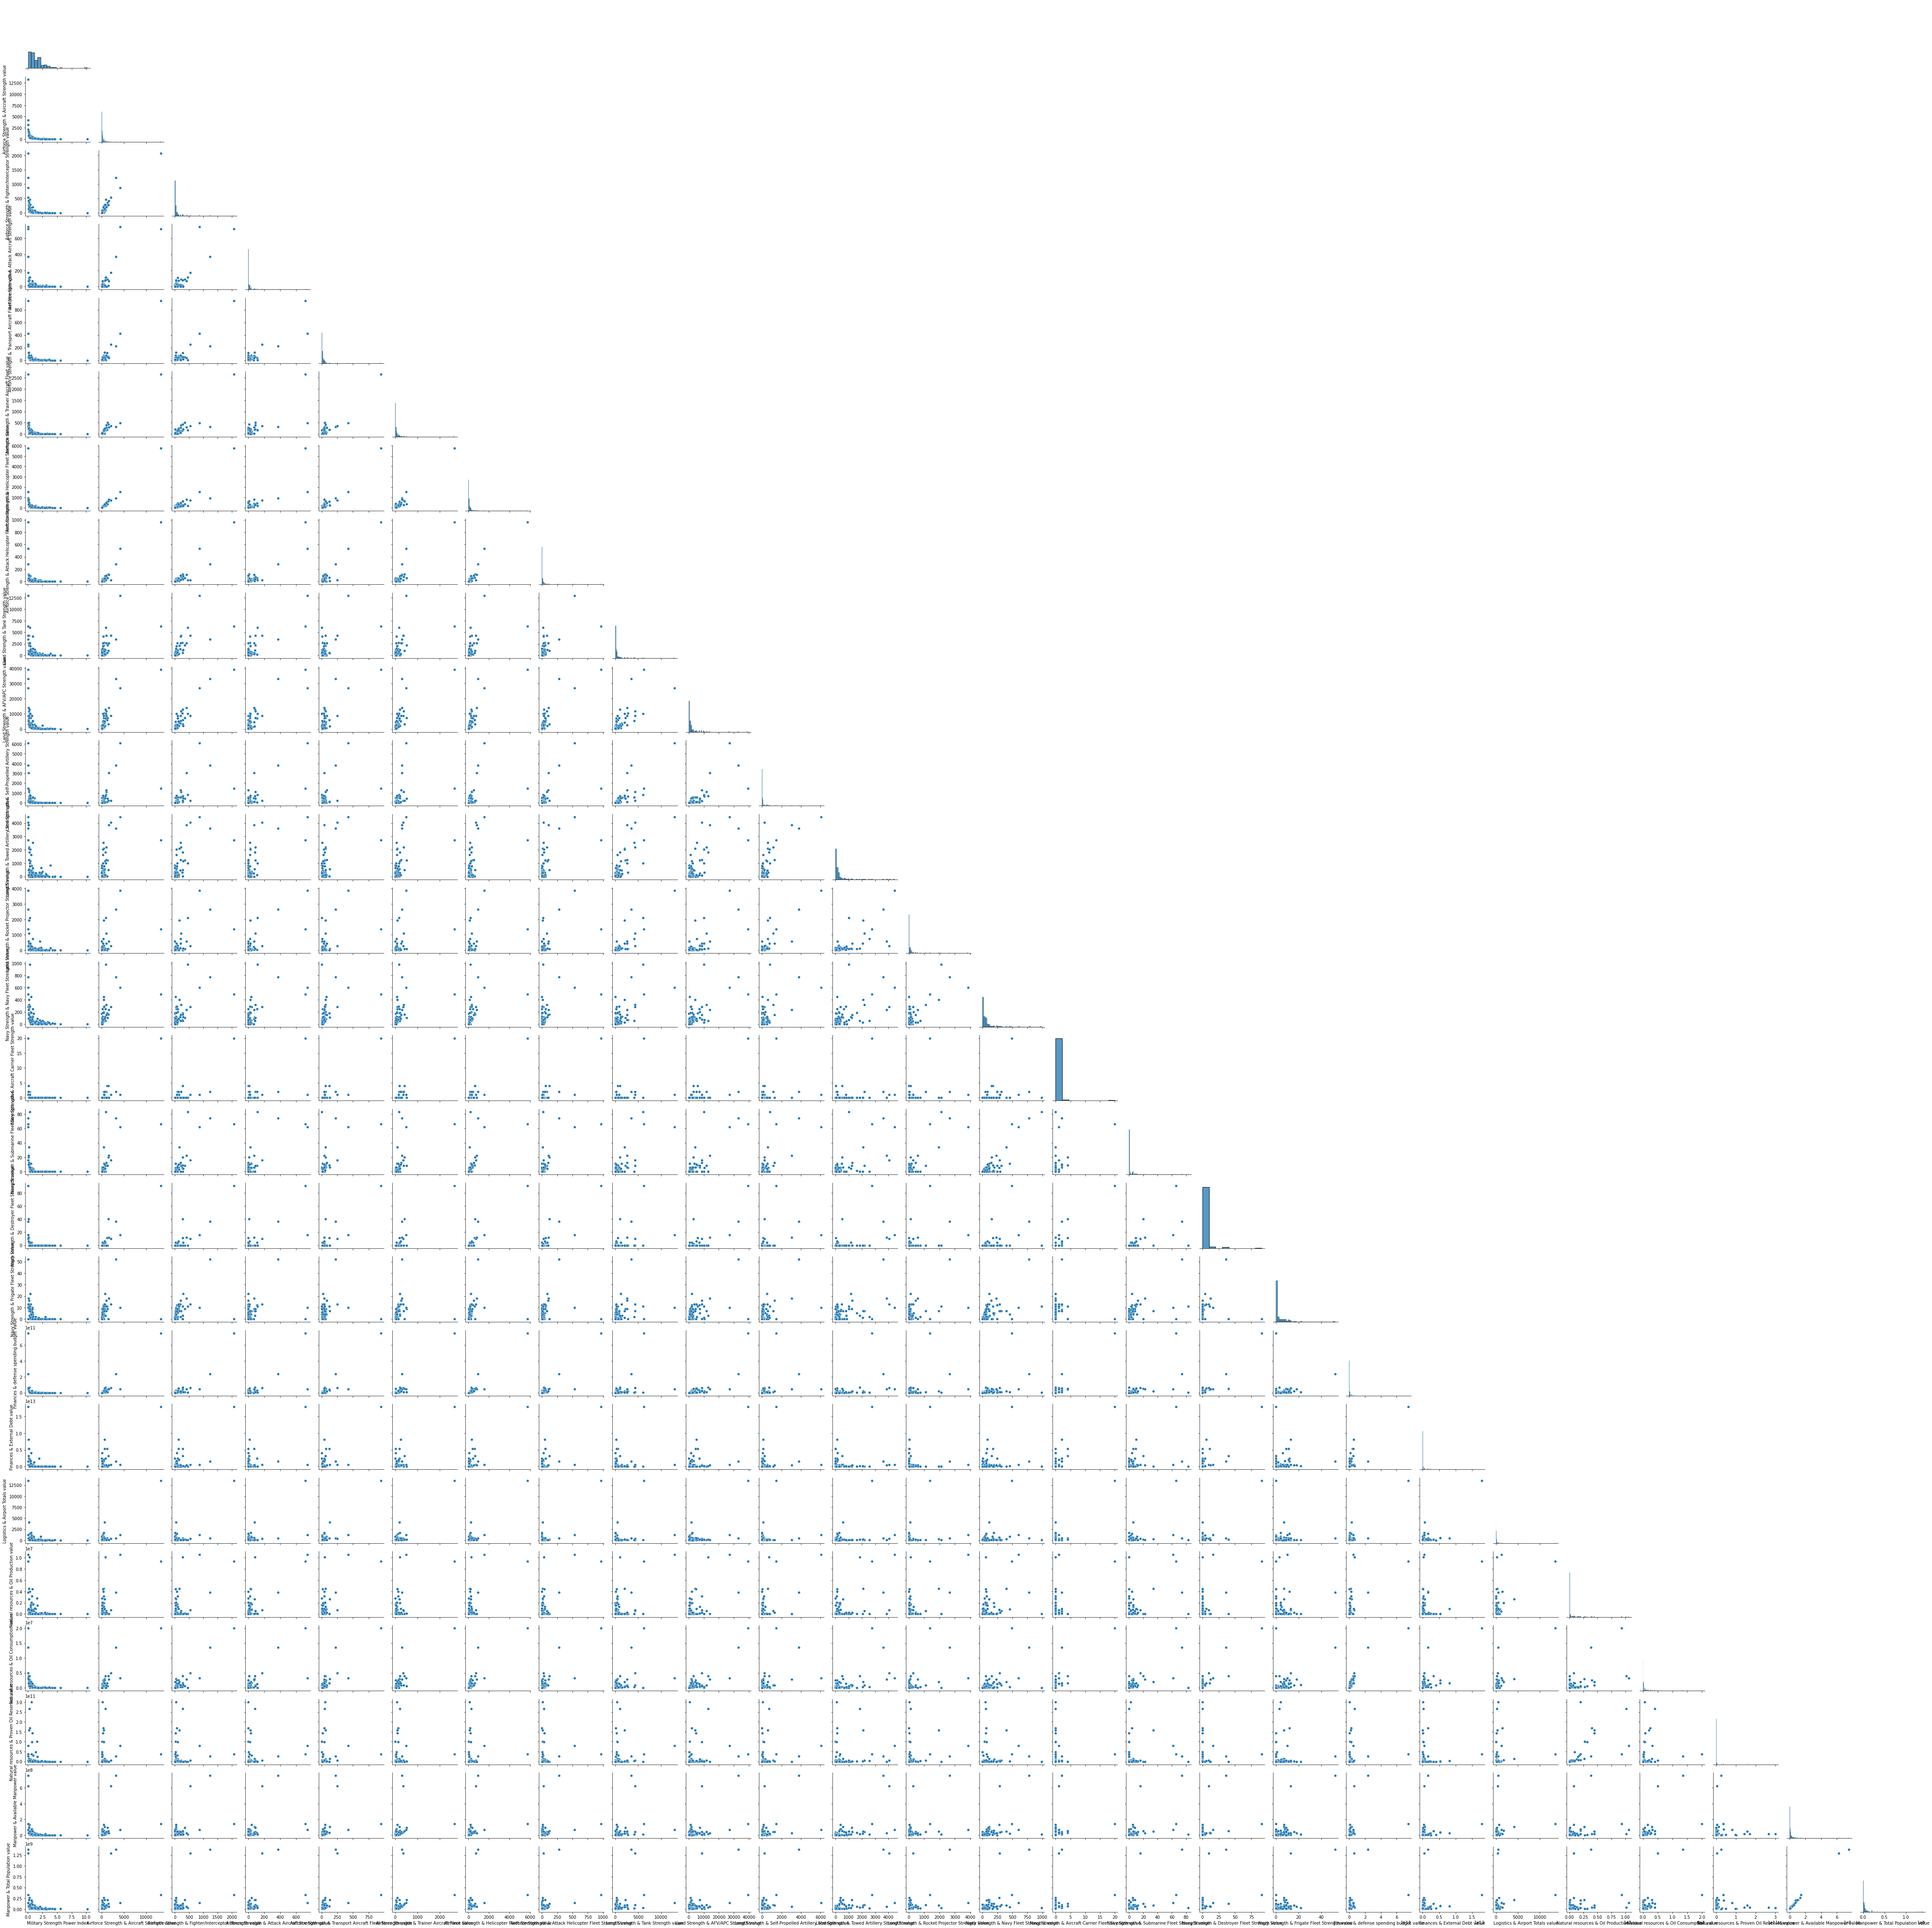

In [39]:
sns.pairplot(df, palette="inferno", corner=True);

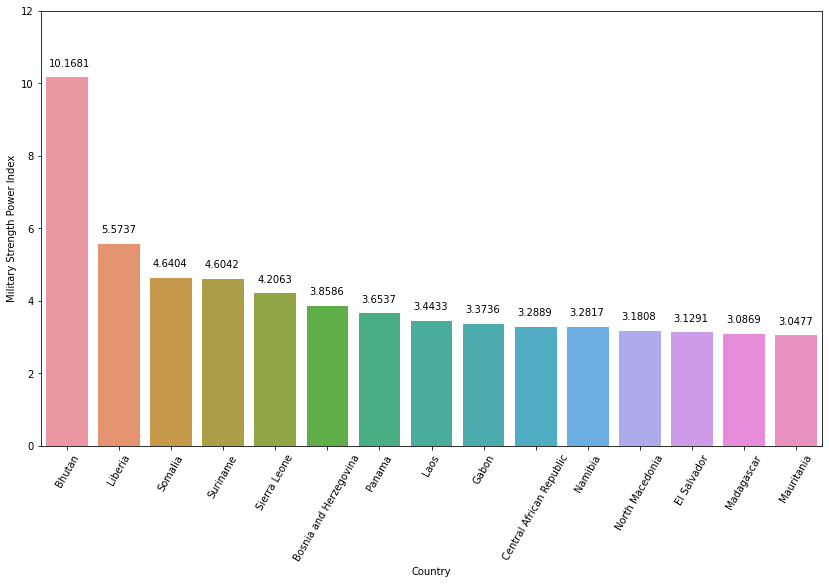

In [40]:
plt.figure(figsize = (14,8))

ax = sns.barplot(x='Country', y='Military Strength Power Index', data=df.nlargest(15, 'Military Strength Power Index'))

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.05, p.get_height()+0.3), fontsize=10, rotation=0)

ax.tick_params(axis='x', labelrotation = 60, labelsize=10)   
ax.set_ylim(0, 12);

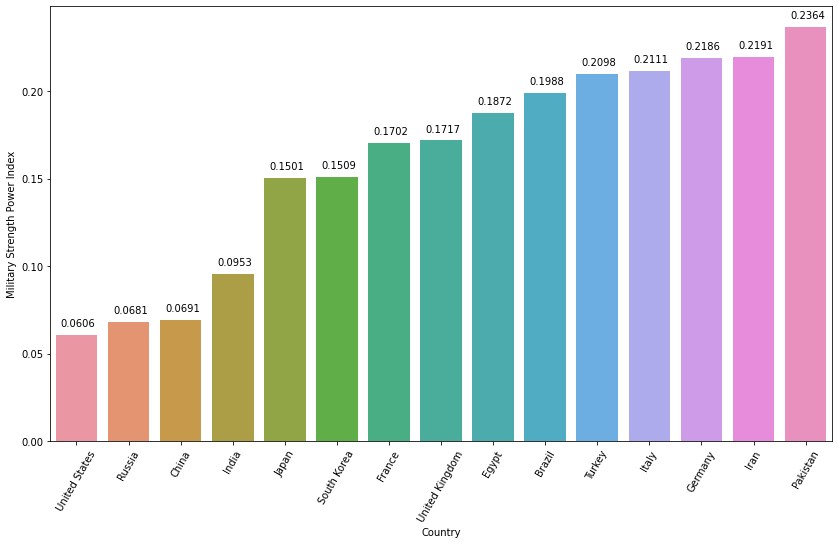

In [41]:
plt.figure(figsize = (14,8))

ax = sns.barplot(x='Country', y='Military Strength Power Index', data=df.nsmallest(15, 'Military Strength Power Index'))

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+0.005), fontsize=10, rotation=0)

ax.tick_params(axis='x', labelrotation = 60, labelsize=10)   
#ax.set_ylim(0, 2);

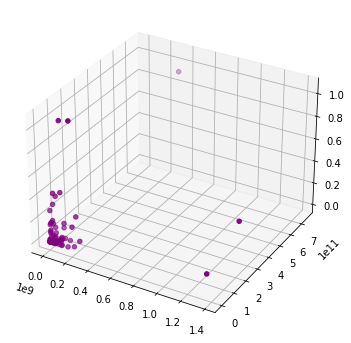

In [42]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Manpower & Total Population value'], df['Finances & defense spending budget value'], 
           df['Natural resources & Oil Production value'], color='purple');

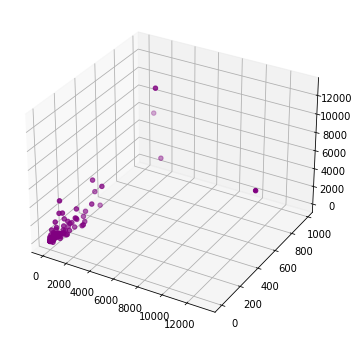

In [43]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Airforce Strength & Aircraft Strength value'], df['Navy Strength & Navy Fleet Strengths value'], 
           df['Land Strength & Tank Strength value'], color='purple');

## Decriptive statistics

In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Military Strength Power Index,138.000,1.461,1.324,0.061,0.575,1.034,2.022,10.168
Airforce Strength & Aircraft Strength value,138.000,388.471,1231.982,0.000,33.000,111.000,290.250,13264.000
Airforce Strength & Fighter/Interceptor Strength value,138.000,81.565,230.325,0.000,0.000,17.000,60.500,2085.000
Airforce Strength & Attack Aircraft Strength value,138.000,25.761,94.528,0.000,0.000,0.000,15.750,742.000
Airforce Strength & Transport Aircraft Fleet Strength value,138.000,30.232,92.330,0.000,3.000,9.000,26.000,945.000
Airforce Strength & Trainer Aircraft Fleet value,138.000,82.833,240.804,0.000,4.250,26.000,79.250,2643.000
Airforce Strength & Helicopter Fleet Strength value,138.000,154.065,520.184,0.000,15.250,44.000,126.750,5768.000
Airforce Strength & Attack Helicopter Fleet Strength value,138.000,25.623,97.326,0.000,0.000,2.000,17.750,967.000
Land Strength & Tank Strength value,138.000,646.565,1515.464,0.000,19.250,153.000,436.250,12950.000
Land Strength & AFV/APC Strength value,138.000,2485.696,5410.546,0.000,250.250,734.500,2000.000,39253.000


<AxesSubplot:>

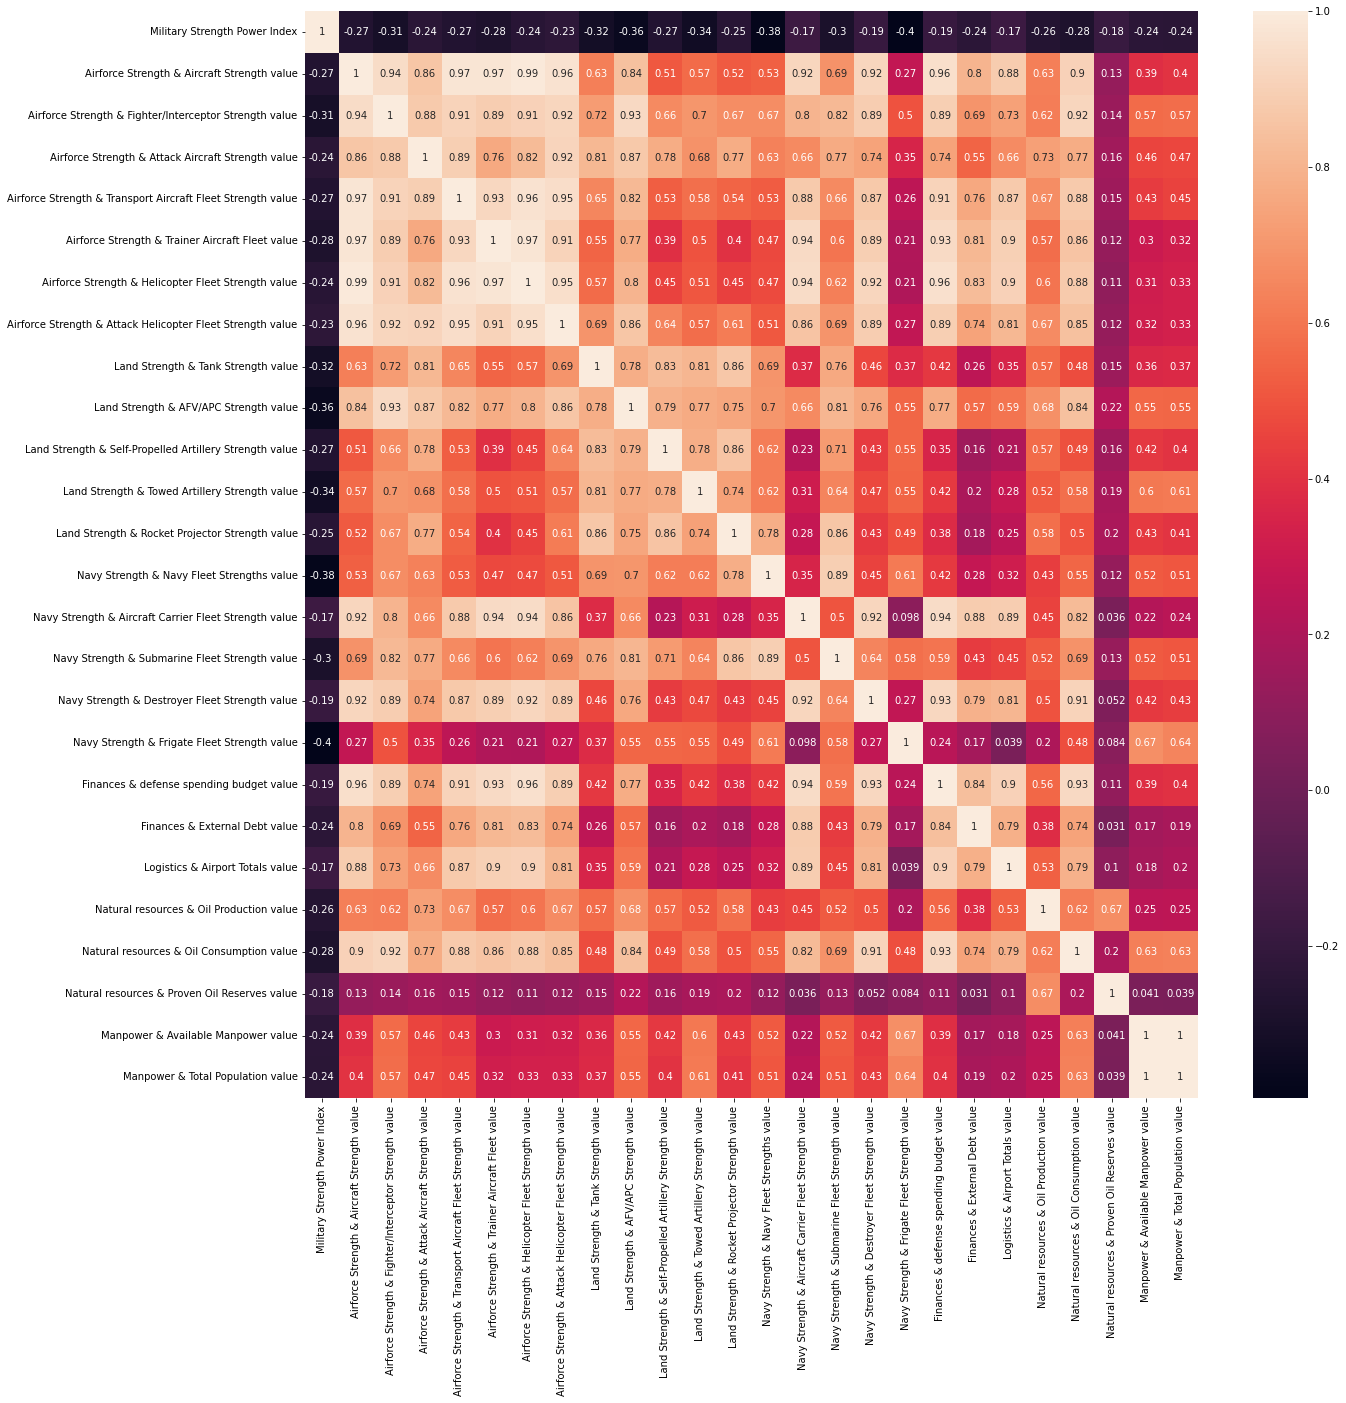

In [45]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True)

# Data Preprocessing

In [46]:
X = df.drop(['Country'], axis=1)

In [47]:
X

,Military Strength Power Index,Airforce Strength & Aircraft Strength value,Airforce Strength & Fighter/Interceptor Strength value,Airforce Strength & Attack Aircraft Strength value,Airforce Strength & Transport Aircraft Fleet Strength value,Airforce Strength & Trainer Aircraft Fleet value,Airforce Strength & Helicopter Fleet Strength value,Airforce Strength & Attack Helicopter Fleet Strength value,Land Strength & Tank Strength value,Land Strength & AFV/APC Strength value,...,Navy Strength & Destroyer Fleet Strength value,Navy Strength & Frigate Fleet Strength value,Finances & defense spending budget value,Finances & External Debt value,Logistics & Airport Totals value,Natural resources & Oil Production value,Natural resources & Oil Consumption value,Natural resources & Proven Oil Reserves value,Manpower & Available Manpower value,Manpower & Total Population value
0,1.344,260.000,0.000,25.000,30.000,0.000,187.000,0.000,0.000,1062.000,...,0.000,0.000,12000000000.000,2840000000.000,43.000,0.000,5500.000,0.000,14325743.000,34940837.000
1,2.314,19.000,0.000,0.000,0.000,0.000,19.000,0.000,0.000,467.000,...,0.000,0.000,250000000.000,9505000000.000,4.000,16000.000,42500.000,168300000.000,1519438.000,3057220.000
2,0.466,551.000,103.000,22.000,59.000,87.000,257.000,45.000,880.000,7361.000,...,0.000,5.000,13000000000.000,6260000000.000,157.000,1306000.000,325000.000,12200000000.000,20741263.000,41657488.000
3,0.838,295.000,72.000,18.000,30.000,47.000,126.000,15.000,379.000,595.000,...,0.000,0.000,7000000000.000,42080000000.000,176.000,1666000.000,82300.000,8273000000.000,6244205.000,30355880.000
4,0.652,227.000,24.000,7.000,9.000,64.000,100.000,0.000,370.000,739.000,...,4.000,0.000,4200000000.000,214900000000.000,1138.000,479400.000,685000.000,2185000000.000,20179430.000,44694198.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,0.645,260.000,38.000,0.000,52.000,82.000,86.000,10.000,390.000,600.000,...,0.000,4.000,745000000.000,100300000000.000,444.000,2007000.000,575000.000,300900000000.000,14260129.000,31689176.000
134,0.356,293.000,77.000,0.000,38.000,36.000,138.000,25.000,2615.000,2530.000,...,0.000,9.000,5500000000.000,96580000000.000,45.000,271400.000,525000.000,4400000000.000,51043216.000,97040334.000
135,1.241,169.000,77.000,0.000,8.000,21.000,61.000,14.000,620.000,615.000,...,0.000,0.000,1400000000.000,7068000000.000,57.000,12260.000,145000.000,3000000000.000,11266221.000,28667230.000
136,1.646,108.000,18.000,0.000,11.000,52.000,27.000,0.000,75.000,184.000,...,0.000,0.000,40000000.000,11660000000.000,88.000,0.000,21000.000,0.000,6166905.000,16445079.000


# Modelling

In [48]:
from sklearn.cluster import KMeans

K_means_model = KMeans(random_state=42)

In [49]:
K_means_model.fit_predict(X)

array([0, 0, 0, 0, 0, 0, 3, 6, 0, 0, 0, 0, 3, 0, 0, 0, 0, 6, 0, 0, 0, 0,
       3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 5,
       0, 6, 0, 0, 0, 6, 6, 0, 0, 7, 0, 7, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 6, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 6, 0, 0, 0, 6, 0, 0, 0, 0,
       6, 0, 7, 0, 0, 0, 6, 3, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 4, 1, 0,
       0, 0, 0, 0, 0, 0])

## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

In [50]:
from pyclustertend import hopkins

In [51]:
df1 = X.copy()
df2 = X.copy()
df3 = X.copy()

In [52]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [53]:
hopkins(df1, df1.shape[0])

0.07359259366206015

In [54]:
hopkins(MinMaxScaler().fit_transform(df2), df2.shape[0])

0.08253512939035436

In [55]:
hopkins(StandardScaler().fit_transform(df3), df3.shape[0])

0.07524468353741252

In [56]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X)

In [57]:
X = pd.DataFrame(df_scaled, columns=X.columns)

In [58]:
X.shape[0]

138

In [59]:
hopkins(X, X.shape[0])

0.0752504871479321

## Clustering with K-means

### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

In [60]:
ssd = []

K = range(2,10)  
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)

Text(0.5, 1.0, 'elbow method')

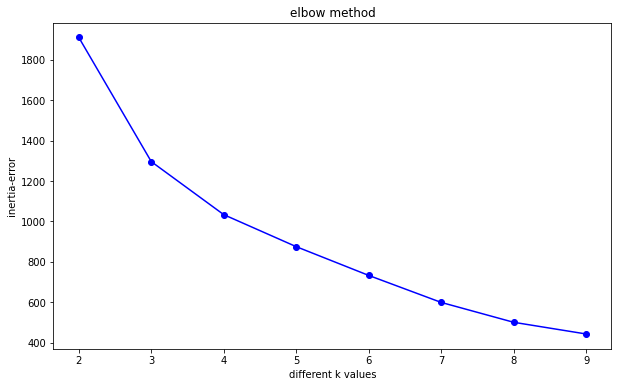

In [61]:
plt.plot(K, ssd, "bo-")
plt.xlabel("different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method")

In [62]:
ssd  # sum of squared distance

[1910.485778287626,
 1295.9772509010095,
 1033.5501175708305,
 875.1033021003722,
 732.7828433920906,
 599.1623598835489,
 500.7928078397045,
 442.90634912788835]

In [63]:
df_diff = pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,614.509
3,262.427
4,158.447
5,142.320
6,133.620
7,98.370
8,57.886


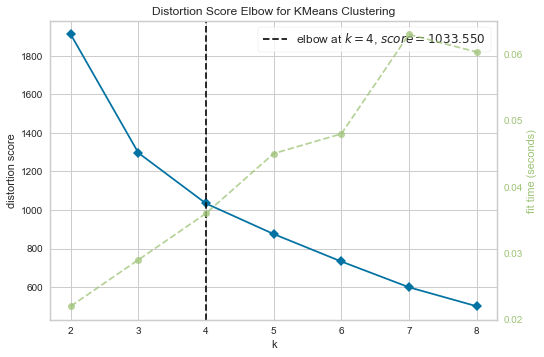

In [64]:
# yellowbrick

from yellowbrick.cluster import KElbowVisualizer
model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X)        
visualizer.show();

In [65]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.8643241079048357
For n_clusters=3, the silhouette score is 0.8190910278354714
For n_clusters=4, the silhouette score is 0.4946051515194771
For n_clusters=5, the silhouette score is 0.5170254038393035
For n_clusters=6, the silhouette score is 0.5227132204838273
For n_clusters=7, the silhouette score is 0.48504398823177286
For n_clusters=8, the silhouette score is 0.4758068701086123


### Model Building and label visualisation

In [66]:
model1 = KMeans(n_clusters=3, random_state=42)
model1.fit(X)

KMeans(n_clusters=3, random_state=42)

In [67]:
model1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0])

In [68]:
df['predicted_clusters_1'] = model1.labels_

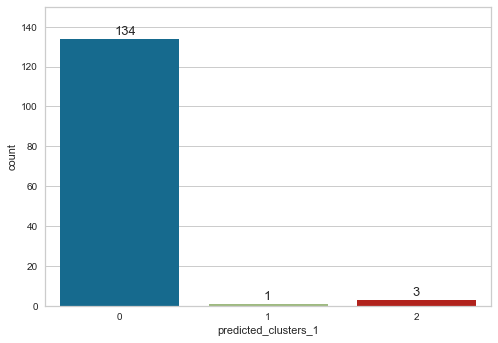

In [69]:
ax = sns.countplot(x='predicted_clusters_1', data=df)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.37, p.get_height()+2), fontsize=13)
    
ax.set_ylim(0, 150);

In [70]:
# model for 4 clusters
model2 = KMeans(n_clusters=4, random_state=42)
model2.fit(X)

KMeans(n_clusters=4, random_state=42)

In [71]:
model2.labels_

array([0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       3, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3,
       0, 3, 0, 0, 0, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 3, 3, 1, 0,
       0, 3, 3, 0, 0, 0])

In [72]:
df['predicted_clusters_1'] = model2.labels_

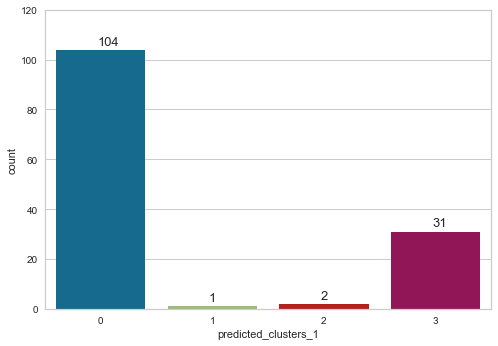

In [73]:
ax = sns.countplot(x='predicted_clusters_1', data=df)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.37, p.get_height()+2), fontsize=13)
    
ax.set_ylim(0, 120);

In [74]:
df.head()

,Country,Military Strength Power Index,Airforce Strength & Aircraft Strength value,Airforce Strength & Fighter/Interceptor Strength value,Airforce Strength & Attack Aircraft Strength value,Airforce Strength & Transport Aircraft Fleet Strength value,Airforce Strength & Trainer Aircraft Fleet value,Airforce Strength & Helicopter Fleet Strength value,Airforce Strength & Attack Helicopter Fleet Strength value,Land Strength & Tank Strength value,...,Navy Strength & Frigate Fleet Strength value,Finances & defense spending budget value,Finances & External Debt value,Logistics & Airport Totals value,Natural resources & Oil Production value,Natural resources & Oil Consumption value,Natural resources & Proven Oil Reserves value,Manpower & Available Manpower value,Manpower & Total Population value,predicted_clusters_1
0,Afghanistan,1.344,260.000,0.000,25.000,30.000,0.000,187.000,0.000,0.000,...,0.000,12000000000.000,2840000000.000,43.000,0.000,5500.000,0.000,14325743.000,34940837.000,0
1,Albania,2.314,19.000,0.000,0.000,0.000,0.000,19.000,0.000,0.000,...,0.000,250000000.000,9505000000.000,4.000,16000.000,42500.000,168300000.000,1519438.000,3057220.000,0
2,Algeria,0.466,551.000,103.000,22.000,59.000,87.000,257.000,45.000,880.000,...,5.000,13000000000.000,6260000000.000,157.000,1306000.000,325000.000,12200000000.000,20741263.000,41657488.000,3
3,Angola,0.838,295.000,72.000,18.000,30.000,47.000,126.000,15.000,379.000,...,0.000,7000000000.000,42080000000.000,176.000,1666000.000,82300.000,8273000000.000,6244205.000,30355880.000,0
4,Argentina,0.652,227.000,24.000,7.000,9.000,64.000,100.000,0.000,370.000,...,0.000,4200000000.000,214900000000.000,1138.000,479400.000,685000.000,2185000000.000,20179430.000,44694198.000,0


In [75]:
X.columns

Index(['Military Strength Power Index', 'Airforce Strength & Aircraft Strength value',
       'Airforce Strength & Fighter/Interceptor Strength value',
       'Airforce Strength & Attack Aircraft Strength value',
       'Airforce Strength & Transport Aircraft Fleet Strength value',
       'Airforce Strength & Trainer Aircraft Fleet value',
       'Airforce Strength & Helicopter Fleet Strength value',
       'Airforce Strength & Attack Helicopter Fleet Strength value',
       'Land Strength & Tank Strength value', 'Land Strength & AFV/APC Strength value',
       'Land Strength & Self-Propelled Artillery Strength value',
       'Land Strength & Towed Artillery Strength value',
       'Land Strength & Rocket Projector Strength value',
       'Navy Strength & Navy Fleet Strengths value',
       'Navy Strength & Aircraft Carrier Fleet Strength value',
       'Navy Strength & Submarine Fleet Strength value',
       'Navy Strength & Destroyer Fleet Strength value',
       'Navy Strength & Fri

In [76]:
X.columns[[1, 13, 18, 24]]

Index(['Airforce Strength & Aircraft Strength value', 'Navy Strength & Navy Fleet Strengths value',
       'Finances & defense spending budget value', 'Manpower & Available Manpower value'],
      dtype='object')

<AxesSubplot:xlabel='Airforce Strength & Aircraft Strength value', ylabel='Navy Strength & Navy Fleet Strengths value'>

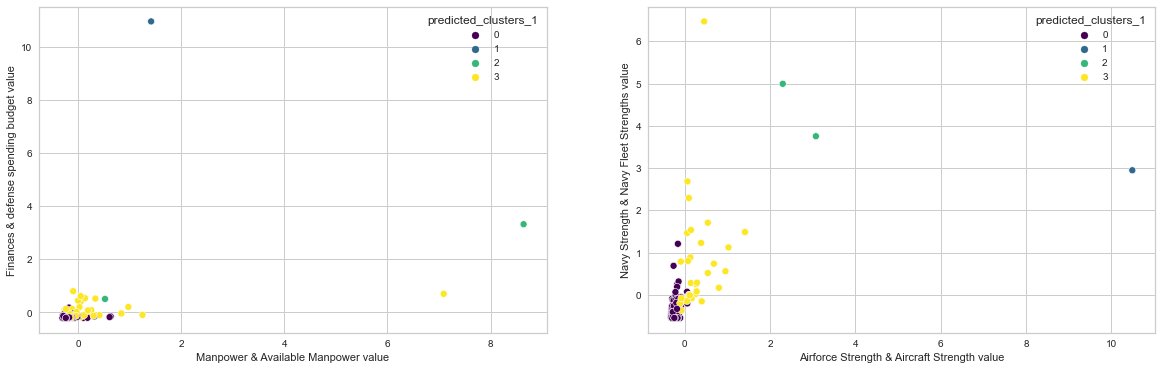

In [77]:
plt.figure(figsize = (20,6))

plt.subplot(121)
sns.scatterplot(data=X, x='Manpower & Available Manpower value', 
                y='Finances & defense spending budget value', hue=df.predicted_clusters_1, palette='viridis')

plt.subplot(122)
sns.scatterplot(data=X, x='Airforce Strength & Aircraft Strength value', 
                y='Navy Strength & Navy Fleet Strengths value', hue=df.predicted_clusters_1, palette='viridis')

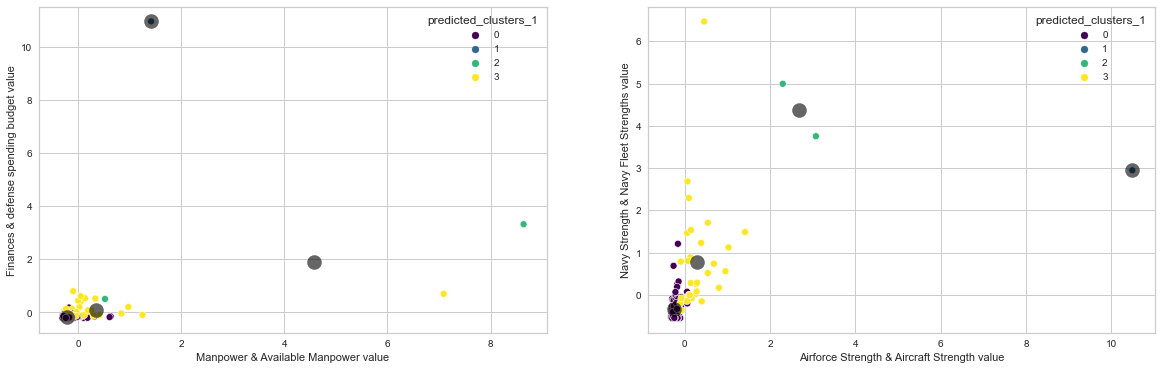

In [78]:
# centers of classes (scaled data for displaying cluster centers)

plt.figure(figsize = (20,6))

centers = model2.cluster_centers_

plt.subplot(121)
sns.scatterplot(data=X, x='Manpower & Available Manpower value', y='Finances & defense spending budget value', 
                hue=df.predicted_clusters_1, palette="viridis")
plt.scatter(centers[:, 24], centers[:, 18], c='black', s=200, alpha=0.6)

plt.subplot(122)
sns.scatterplot(data=X, x='Airforce Strength & Aircraft Strength value', y='Navy Strength & Navy Fleet Strengths value', 
                hue=df.predicted_clusters_1, palette="viridis")
plt.scatter(centers[:, 1], centers[:, 13], c='black', s=200, alpha=0.6)

In [79]:
df[df['predicted_clusters_1'] == 1][['Country', 'Military Strength Power Index']]

,Country,Military Strength Power Index
130,United States,0.061


In [80]:
df[df['predicted_clusters_1'] == 2][['Country', 'Military Strength Power Index']]

,Country,Military Strength Power Index
26,China,0.069
101,Russia,0.068


In [81]:
df[df['predicted_clusters_1'] == 3][['Country', 'Military Strength Power Index']].sort_values(
                                                                by='Military Strength Power Index', ascending=True)

,Country,Military Strength Power Index
49,India,0.095
57,Japan,0.150
110,South Korea,0.151
40,France,0.170
129,United Kingdom,0.172
35,Egypt,0.187
17,Brazil,0.199
124,Turkey,0.210
55,Italy,0.211
43,Germany,0.219


In [82]:
df[df['predicted_clusters_1'] == 0][['Country', 'Military Strength Power Index']].sort_values(
                                                                by='Military Strength Power Index', ascending=True)

,Country,Military Strength Power Index
6,Australia,0.323
96,Poland,0.340
109,South Africa,0.498
117,Switzerland,0.526
89,Norway,0.528
...,...,...
104,Sierra Leone,4.206
115,Suriname,4.604
108,Somalia,4.640
66,Liberia,5.574


### Evaluate 

In [83]:
print(f'Inertia Score (n=4)    : {model2.inertia_}')
print(f'Silhouette Score (n=4) : {silhouette_score(X, model2.labels_)}')

Inertia Score (n=4)    : 1033.5501175708305
Silhouette Score (n=4) : 0.4946051515194771


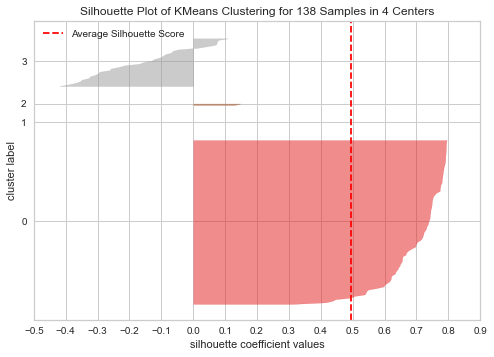

In [84]:
# classes' silhouette scores

from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(4, random_state=42)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X) 
visualizer.poof();

In [85]:
df.groupby('predicted_clusters_1').mean().T

predicted_clusters_1,0,1,2,3
Military Strength Power Index,1.826,0.061,0.069,0.370
Airforce Strength & Aircraft Strength value,93.962,13264.000,3686.500,748.387
Airforce Strength & Fighter/Interceptor Strength value,17.125,2085.000,1052.500,170.484
Airforce Strength & Attack Aircraft Strength value,4.798,715.000,556.500,39.613
Airforce Strength & Transport Aircraft Fleet Strength value,8.673,945.000,324.000,54.097
Airforce Strength & Trainer Aircraft Fleet value,22.904,2643.000,405.500,180.484
Airforce Strength & Helicopter Fleet Strength value,39.750,5768.000,1216.500,287.935
Airforce Strength & Attack Helicopter Fleet Strength value,5.115,967.000,406.000,39.516
Land Strength & Tank Strength value,197.894,6289.000,8225.000,1480.839
Land Strength & AFV/APC Strength value,697.433,39253.000,30019.000,5522.645


***

## Hierarchical Clustering

In [86]:
from scipy.cluster.hierarchy import dendrogram, linkage

### Dendogram

In [87]:
hc_ward = linkage(X, "ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

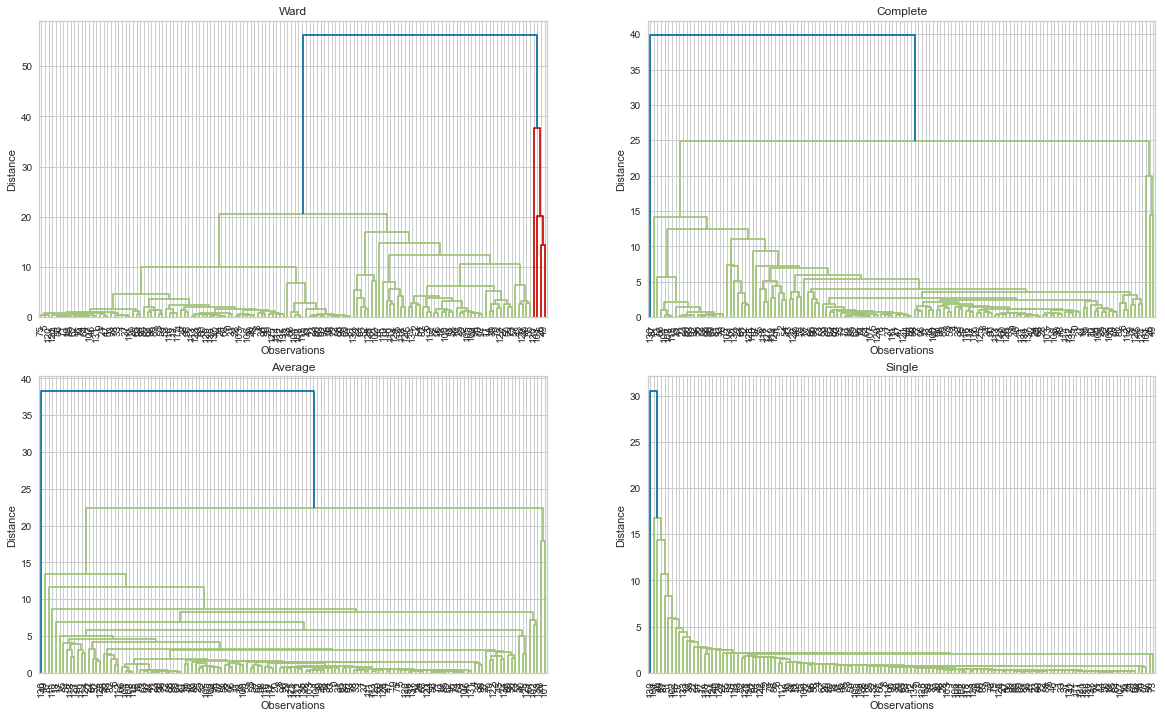

In [88]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

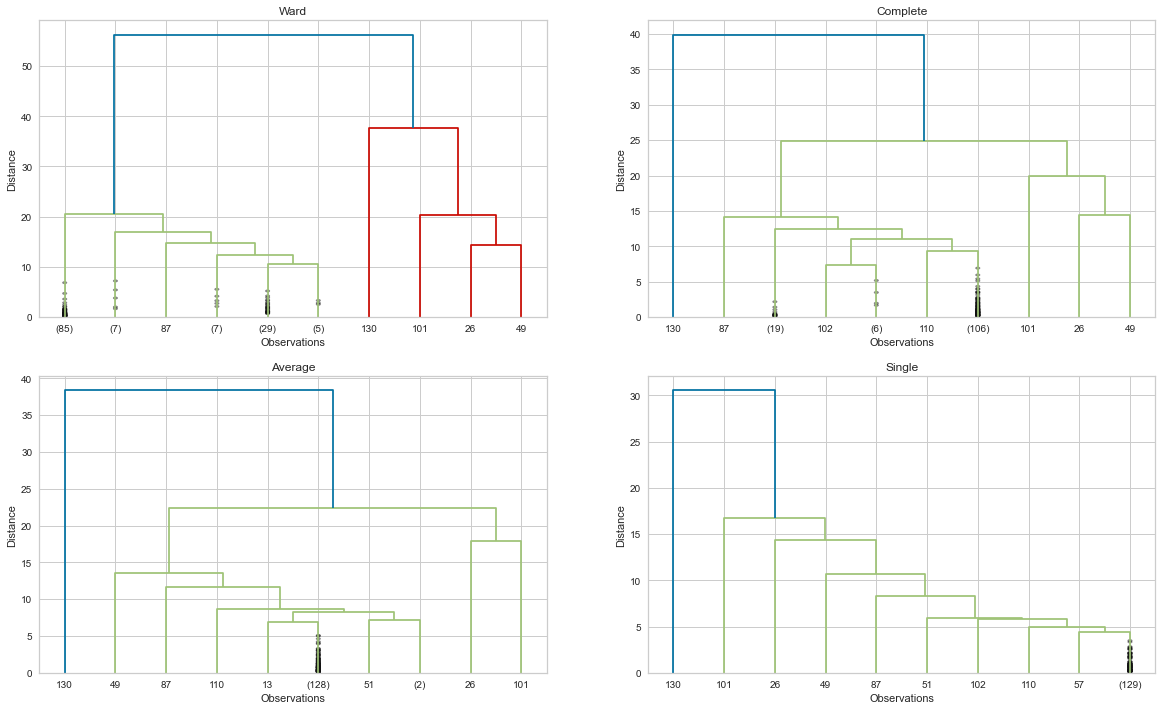

In [89]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

### Model Building and label visualisation

In [90]:
from sklearn.cluster import AgglomerativeClustering

In [91]:
K = range(2,10)

for k in K:
    agg = AgglomerativeClustering(n_clusters=k)
    agg.fit_predict(X)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X, agg.labels_)}')

Silhouette Score for 2 clusters: 0.84660213893114
Silhouette Score for 3 clusters: 0.8190910278354714
Silhouette Score for 4 clusters: 0.3446482014373428
Silhouette Score for 5 clusters: 0.3444814384143726
Silhouette Score for 6 clusters: 0.35593404098655446
Silhouette Score for 7 clusters: 0.35399123550705447
Silhouette Score for 8 clusters: 0.3534261606641069
Silhouette Score for 9 clusters: 0.3378222599934962


In [92]:
model3 = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
model3.fit_predict(X)

array([3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 1, 3, 3, 1, 1, 3, 3, 3,
       1, 3, 3, 1, 0, 1, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 1,
       3, 1, 3, 3, 3, 0, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 3, 3, 3, 3, 1,
       3, 3, 3, 1, 3, 3, 1, 3, 1, 1, 3, 3, 1, 0, 1, 3, 3, 1, 3, 3, 3, 1,
       1, 3, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 1, 1, 1, 2, 3,
       3, 1, 1, 3, 3, 3], dtype=int64)

In [93]:
model3.labels_

array([3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 1, 3, 3, 1, 1, 3, 3, 3,
       1, 3, 3, 1, 0, 1, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 1,
       3, 1, 3, 3, 3, 0, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 3, 3, 3, 3, 1,
       3, 3, 3, 1, 3, 3, 1, 3, 1, 1, 3, 3, 1, 0, 1, 3, 3, 1, 3, 3, 3, 1,
       1, 3, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 1, 1, 1, 2, 3,
       3, 1, 1, 3, 3, 3], dtype=int64)

In [94]:
df['predicted_clusters_2'] = model3.labels_

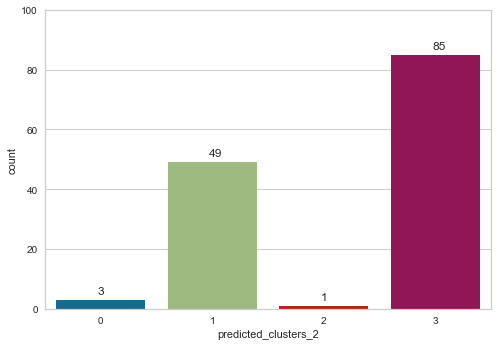

In [95]:
ax = sns.countplot(x='predicted_clusters_2', data=df)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.37, p.get_height()+2), fontsize=12)
    
ax.set_ylim(0, 100);

<AxesSubplot:xlabel='Airforce Strength & Aircraft Strength value', ylabel='Navy Strength & Navy Fleet Strengths value'>

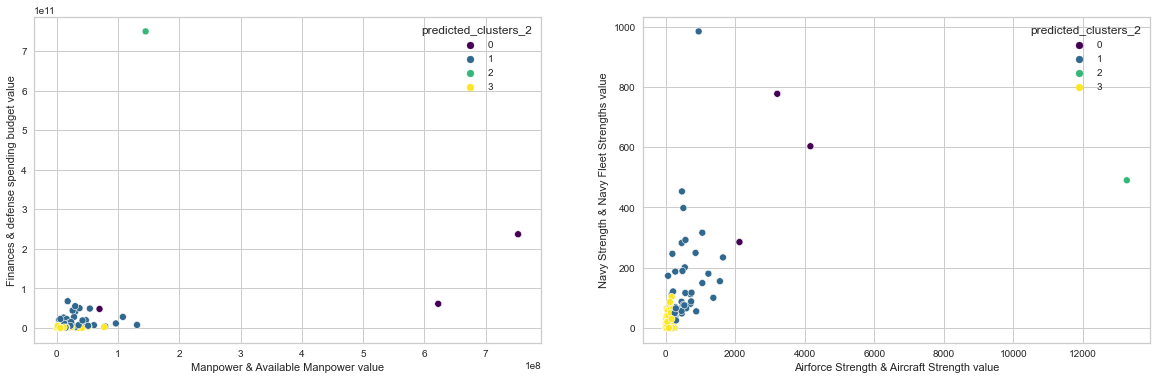

In [96]:
plt.figure(figsize = (20,6))

plt.subplot(121)
sns.scatterplot(data=df, x='Manpower & Available Manpower value', 
                y='Finances & defense spending budget value', hue=df.predicted_clusters_2, palette='viridis')

plt.subplot(122)
sns.scatterplot(data=df, x='Airforce Strength & Aircraft Strength value', 
                y='Navy Strength & Navy Fleet Strengths value', hue=df.predicted_clusters_2, palette='viridis')

In [97]:
df[df['predicted_clusters_2'] == 2][['Country', 'Military Strength Power Index']].sort_values(
                                                                by='Military Strength Power Index', ascending=True)

,Country,Military Strength Power Index
130,United States,0.061


In [98]:
df[df['predicted_clusters_2'] == 0][['Country', 'Military Strength Power Index']].sort_values(
                                                                by='Military Strength Power Index', ascending=True)

,Country,Military Strength Power Index
101,Russia,0.068
26,China,0.069
49,India,0.095


In [99]:
df[df['predicted_clusters_2'] == 1][['Country', 'Military Strength Power Index']].sort_values(
                                                                by='Military Strength Power Index', ascending=True)

,Country,Military Strength Power Index
57,Japan,0.150
110,South Korea,0.151
40,France,0.170
129,United Kingdom,0.172
35,Egypt,0.187
17,Brazil,0.199
124,Turkey,0.210
55,Italy,0.211
43,Germany,0.219
51,Iran,0.219


In [100]:
df[df['predicted_clusters_2'] == 3][['Country', 'Military Strength Power Index']].sort_values(
                                                                by='Military Strength Power Index', ascending=True)

,Country,Military Strength Power Index
117,Switzerland,0.526
89,Norway,0.528
116,Sweden,0.530
30,Czechia,0.553
86,Nigeria,0.648
...,...,...
104,Sierra Leone,4.206
115,Suriname,4.604
108,Somalia,4.640
66,Liberia,5.574


### Evaluate 

In [101]:
print(f'Silhouette Score (n=4) : {silhouette_score(X, model3.labels_)}')

Silhouette Score (n=4) : 0.3446482014373428


In [102]:
df.groupby('predicted_clusters_2').mean().T

predicted_clusters_2,0,1,2,3
Military Strength Power Index,0.077,0.532,0.061,2.062
Airforce Strength & Aircraft Strength value,3165.333,509.796,13264.000,69.047
Airforce Strength & Fighter/Interceptor Strength value,881.000,112.980,2085.000,11.671
Airforce Strength & Attack Aircraft Strength value,428.333,24.286,715.000,4.294
Airforce Strength & Transport Aircraft Fleet Strength value,299.333,35.898,945.000,6.706
Airforce Strength & Trainer Aircraft Fleet value,390.000,129.796,2643.000,14.800
Airforce Strength & Helicopter Fleet Strength value,1051.667,198.000,5768.000,31.012
Airforce Strength & Attack Helicopter Fleet Strength value,278.333,28.837,967.000,3.776
Land Strength & Tank Strength value,6914.000,1013.939,6289.000,147.200
Land Strength & AFV/APC Strength value,22908.000,3972.367,39253.000,475.329


***